## Metis Technical Assessment - Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chartify

Loading BokehJS ...

In [2]:
chi_df = pd.read_csv('Speed_Camera_Violations.csv')
chi_df.head(10)

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN
5,5529 S WESTERN,CHI068,08/03/2014,20,NaN,NaN,NaN,NaN,NaN
6,1111 N HUMBOLDT,CHI010,07/30/2014,66,NaN,NaN,NaN,NaN,NaN
7,5520 S WESTERN,CHI069,07/28/2014,18,NaN,NaN,NaN,NaN,NaN
8,5520 S WESTERN,CHI069,07/16/2014,17,NaN,NaN,NaN,NaN,NaN
9,5520 S WESTERN,CHI069,07/24/2014,11,NaN,NaN,NaN,NaN,NaN


In [4]:
len(chi_df[chi_df['VIOLATIONS'] < 100])

161541

In [5]:
len(chi_df[chi_df['VIOLATIONS'] > 400])

13

In [6]:
chi_df[chi_df['VIOLATIONS'] == chi_df['VIOLATIONS'].max()]

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
33231,4909 N CICERO AVE,CHI149,05/23/2015,479,1.143501e+06,1.932251e+06,41.970135,-87.747724,"(41.970134735816295, -87.7477237971432)"
34570,4909 N CICERO AVE,CHI149,06/06/2015,479,1.143501e+06,1.932251e+06,41.970135,-87.747724,"(41.970134735816295, -87.7477237971432)"


So most cameras produce less than 100 violations a day, however there are days in which a small number of cameras produce more than 400 violations. Cicero Avenue seems to produce lots of violations. 

### Daily Average

The numerical daily average can be calculated below. We will check the distribution of the violations as well to see how meaningful this average might be. 

In [7]:
round(chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum().mean(),2)

3008.38

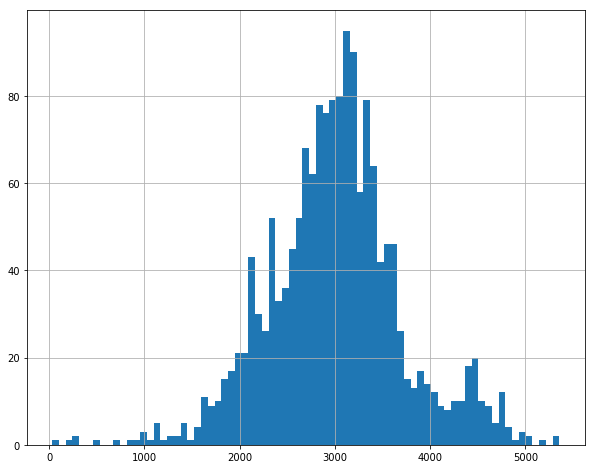

In [8]:
chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum().hist(figsize=(10,8), bins=75)

The distribution of violations per day looks pretty even so the mean value of 3008 per day seems believable.

## More of less cameras over time

In [9]:
chi_df['VIOLATION DATE'] = pd.to_datetime(chi_df['VIOLATION DATE'], format='%m/%d/%Y')
chi_df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,2014-07-08,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,2014-07-16,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,2014-07-08,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,2014-07-26,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,2014-07-27,92,NaN,NaN,NaN,NaN,NaN


Let's first look at the number of active cameras per day.

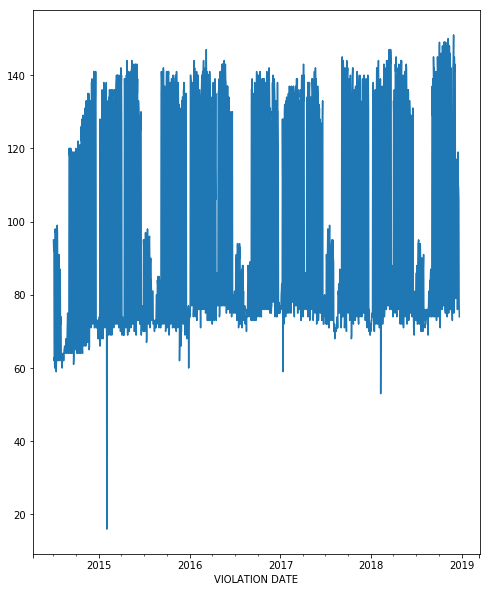

In [10]:
chi_df.groupby('VIOLATION DATE')['CAMERA ID'].nunique().plot(figsize=(8,10))

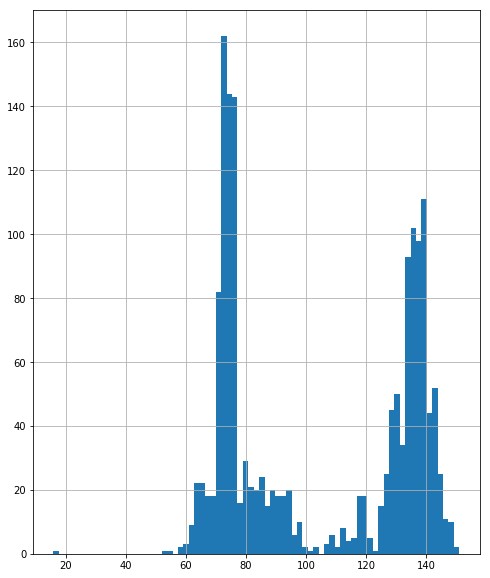

In [11]:
chi_df.groupby('VIOLATION DATE')['CAMERA ID'].nunique().hist(figsize=(8,10), bins=75)

The number of active cameras per day seems to fluctuate between ~75 to ~135 there doesn't seem to be significantly more or less cameras at the end of time interval than at the beginning. It does appear as though the number of active cameras decreases significantly around the middle of the year. 

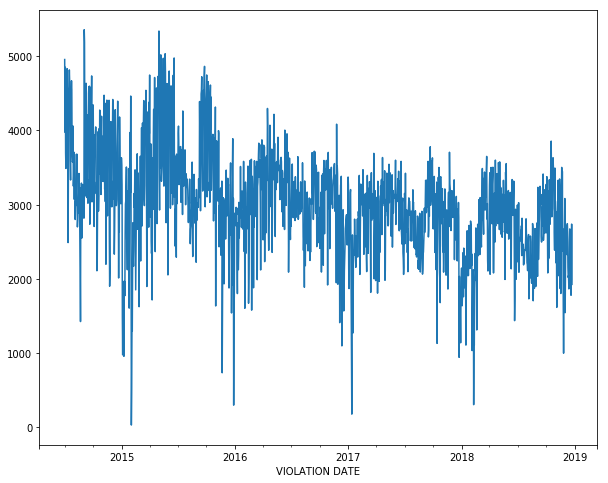

In [12]:
chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum().plot(figsize=(10,8))

The number of violations appears to have dropped at first but could have reached a plateau by the end of 2018. 

## Most likely day to get a speeing violation

Let's exmaine several plots of the total number of violations in select months across the time interval to gain some insight.

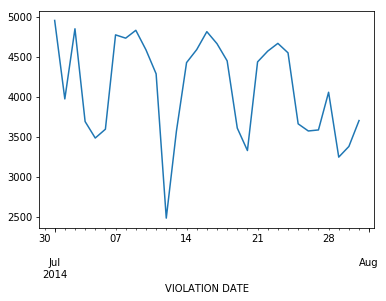

In [18]:
chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum()[:31].plot()

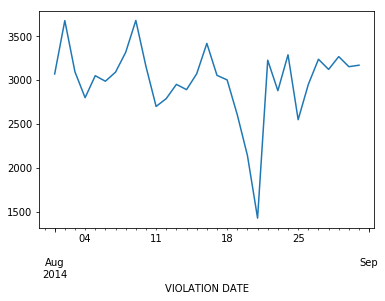

In [19]:
chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum()[31:62].plot()

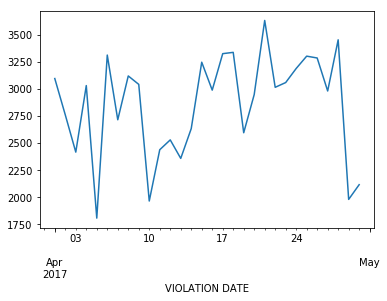

In [30]:
chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum()[1005:1035].plot()

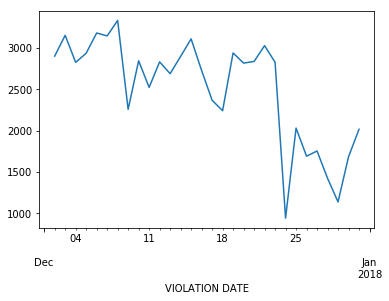

In [38]:
chi_df.groupby('VIOLATION DATE')['VIOLATIONS'].sum()[1250:1280].plot()

It appears that drivers were most likely to recieve a ticket during the middle of the week when the system first went into place. Tuesday-Thursday are typically heavy violation days in the early months. However, after several years, the most heavily ticketed day appears to be Friday. A hypothesis on this result could be that daily commuters were the most heavily ticketed group when the system first took effect. Over time, those commuters learned to drive slower. This could possibly mean that visitors (arriving on the weekend) to the city then became the most heavily ticketed group. 

In [58]:
chi_df.groupby('ADDRESS')['VIOLATIONS'].sum()[:20]

ADDRESS
10318 S INDIANAPOLIS    162560
1110 S PULASKI RD        14937
1111 N HUMBOLDT          91021
11144 S VINCENNES        16961
11153 S VINCENNES         7836
1117 S PULASKI RD        13332
1142 W IRVING PARK      129737
115 N OGDEN              63466
1226 N WESTERN AVE       11905
1229 N WESTERN AVE       26967
1315 W GARFIELD BLVD     69585
1334 W GARFIELD BLVD     79251
14 W CHICAGO AVE          1617
140 N ASHLAND            20297
141 N ASHLAND             9220
1440 W CERMAK RD         28417
1444 W DIVISION ST         867
1455 W DIVISION ST        2330
1507 W 83rd ST            9148
1635 N ASHLAND AVE       18545
Name: VIOLATIONS, dtype: int64

Many of these cameras are located with a few doors away from another camera. 1444 Division st and 1455 Division st, for example. for many of these close-paired cameras, the total number of violations drop significantly for one of the two cameras. 

11144 S Vincennes had 16961 total violations, but 11153 S Vincennes had only 7836 violations. That's a 50% drop in violations. The same effect occurs on Western Ave., Garfield blvd, and N Ashland. This occurs in most other slices of the data as well. Presumably, drivers are not aware if they have been ticketed for speeding since the system is automated, so there could be some effect on drving speed simply buy seeing a speed camera. 

Alternatively, may there is something about the orientation of the cameras that makes them more noticable in one direction, but not noticed in another. 